# 목차

<font color = "blue"><p>
- [데이터 정보 확인](#데이터-정보-확인)
- [결측치 처리](#결측치-처리)
- [범주형 변수 처리: One Hot Encoding](#범주형-변수-처리:-One-Hot-Encoding)
- [이상치 처리](#이상치-처리)
- [Scaling](#Scaling)
- [Transform](#Transform)
- [Feature Selection](#Feature-Selection)
- [PCA](#PCA)

# 라이브러리 및 데이터 로드 

In [1]:
# pip install misssingno
# pip install klib 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

#plt.style.use('seaborn')

import missingno as msno
import klib

#ignore warningss
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 원본데이터가 상하지 않게 copy해서 불러오는 습관을 들이자
train_df = pd.read_csv('train.csv').copy()
test_df = pd.read_csv('test.csv').copy()

# 데이터 정보 확인

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# survived column은 y값이기 때문에 없음

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 결측치 확인 

<font color = blue> 모델 알고리즘에 따라 NaN 데이터가 있어도 작동하기는 하지만 왠만하면 처리해준다.(데이터와 상황마다 다르고, 성능에 따라 판단한다.)

In [8]:
print('train data 결측치 비율 \n')

for col in train_df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * train_df[col].isnull().sum() / train_df[col].shape[0])
    print(msg)

train data 결측치 비율 

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [9]:
print('test data 결측치 비율 \n')
for col in test_df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * test_df[col].isnull().sum() / test_df[col].shape[0])
    print(msg)

test data 결측치 비율 

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


### 시각화를 통한 결측치 확인

<font color = blue> klib 패키지 활용

GridSpec(6, 6)

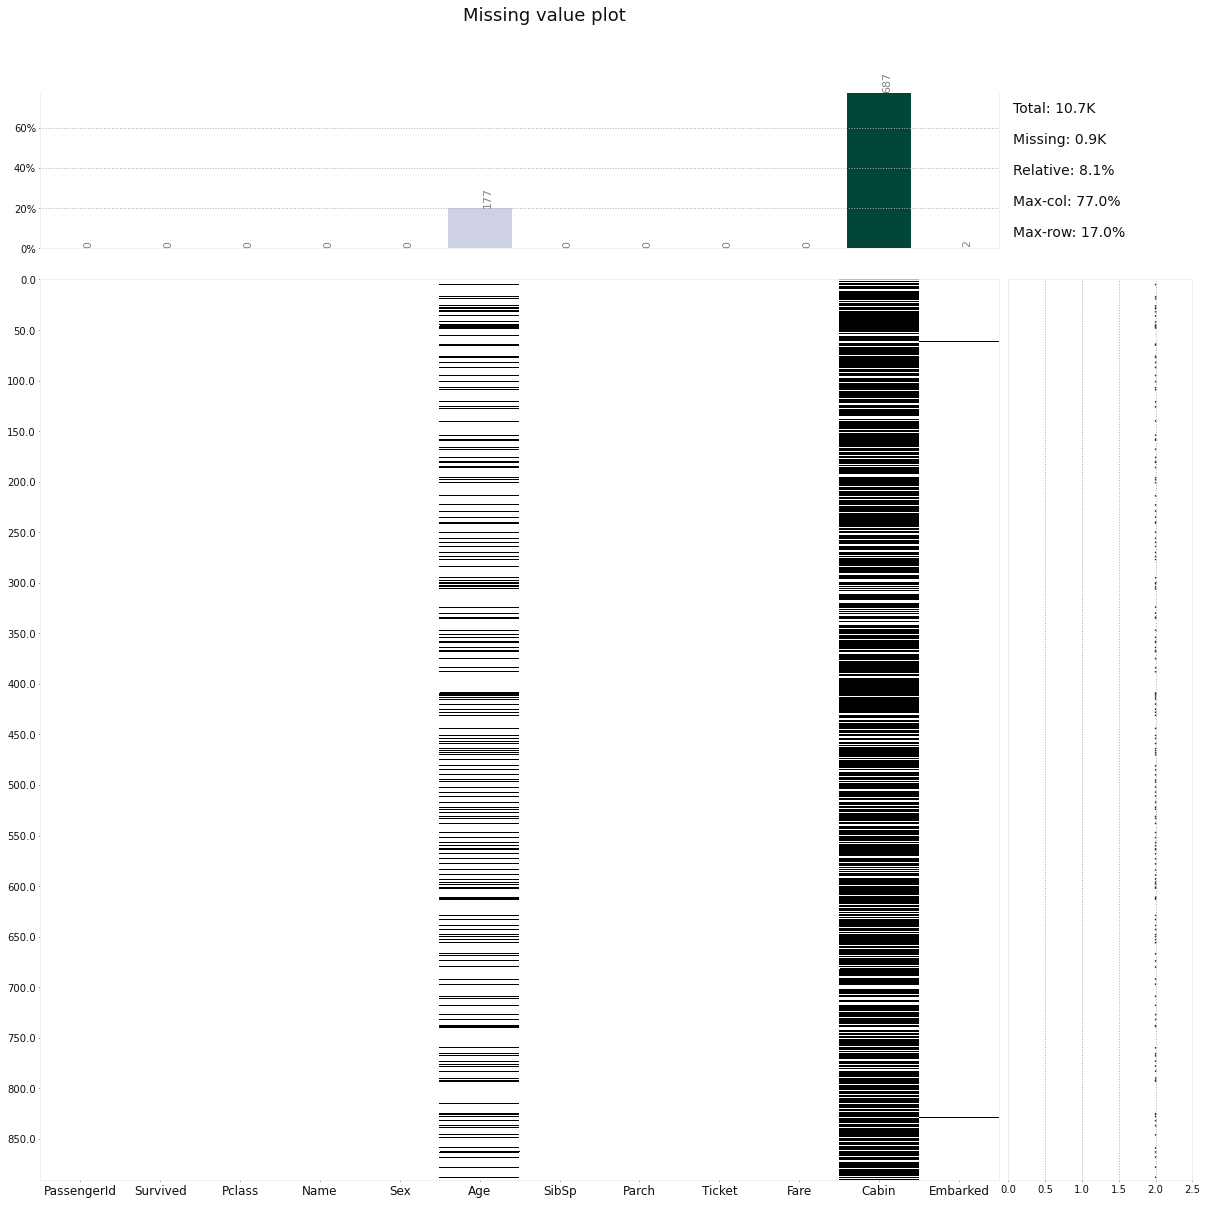

In [10]:
klib.missingval_plot(train_df)

GridSpec(6, 6)

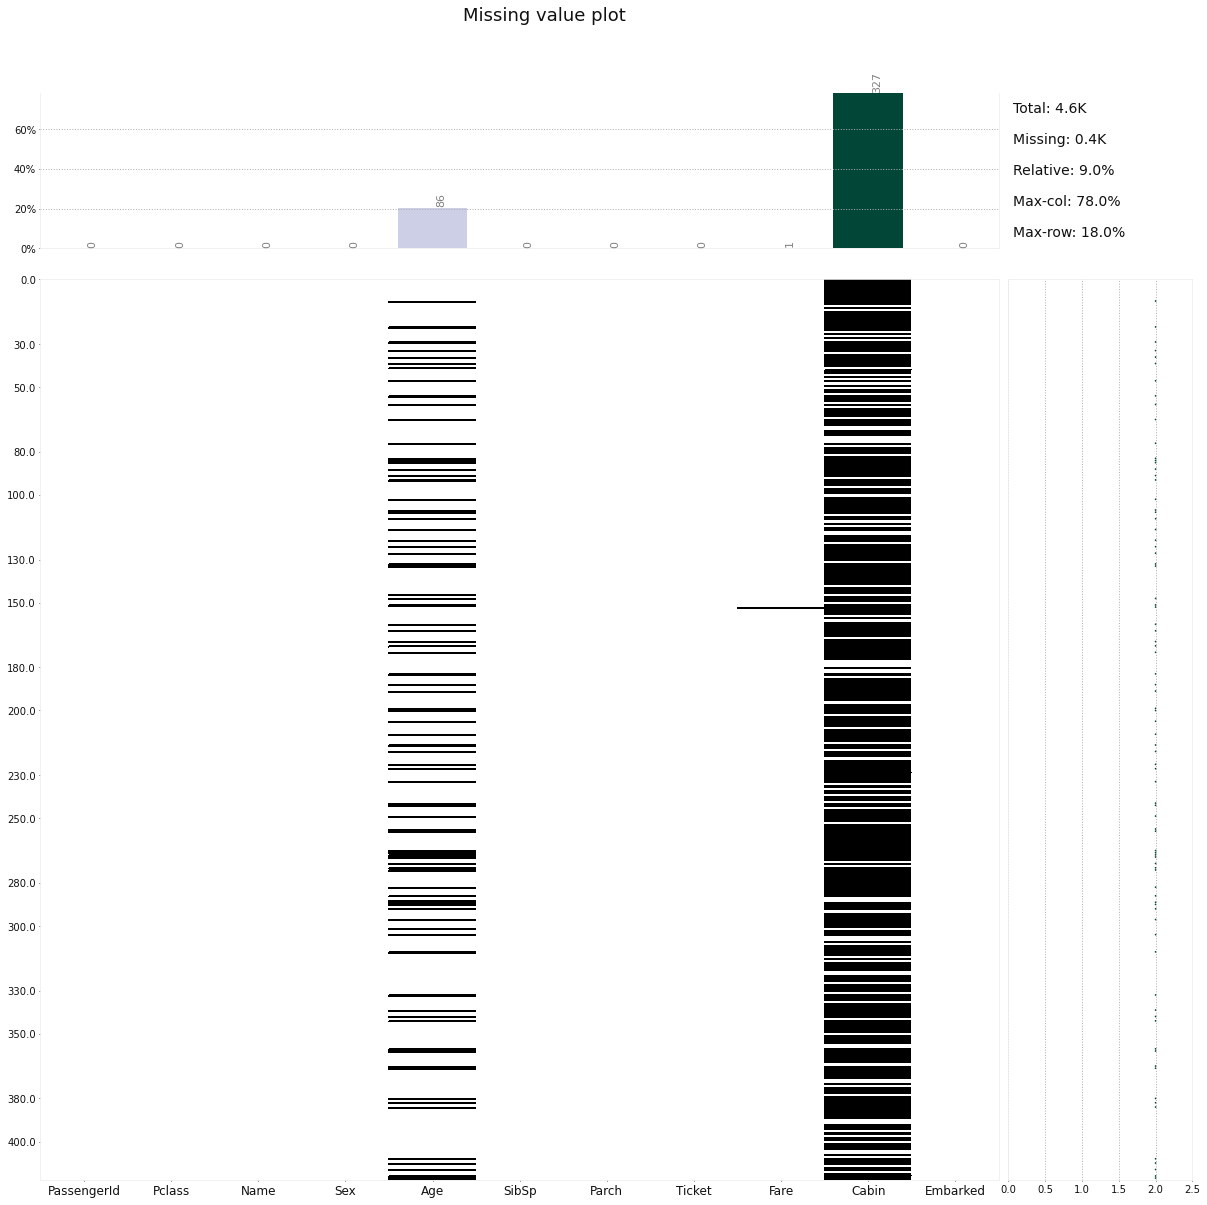

In [11]:
klib.missingval_plot(test_df, )

<font color = blue> missingno 패키지 활용

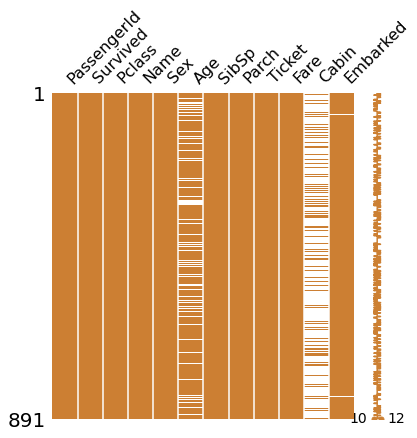

In [12]:
msno.matrix(df = train_df,
           figsize=(6,6),
           color = (0.8, 0.5, 0.2))
plt.show()

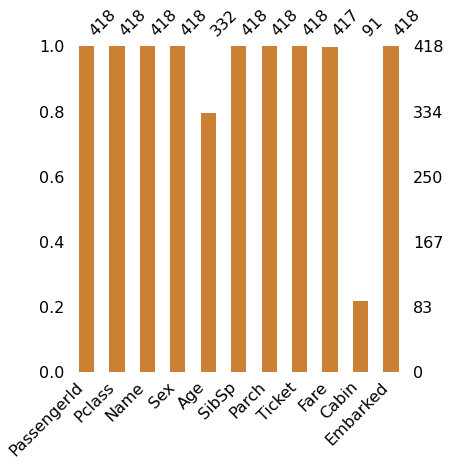

In [13]:
msno.bar(df = test_df,
           figsize=(6,6),
           color = (0.8, 0.5, 0.2))
plt.show()

# 결측치 처리

모든 결측치 처리 방법은 train data를 기준으로 한 뒤 test data에는 적용하는 방식으로 진행되어야 한다!   

age, cabin, embarked 3개의 Feature에 대해 각각 다른 결측치 처리 방법을 적용

### [Cabin]

In [14]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [15]:
train_df.drop('Cabin', axis = 1, inplace=True)
test_df.drop('Cabin', axis = 1, inplace=True)

In [16]:
train_df.shape, test_df.shape

((891, 11), (418, 10))

### [Age]

데이터의 속성에 따라 결측치를 처리하는 방법도 달라져야 한다.   
Numeric? Categoric?

In [17]:
train_df.loc[:, ['Age', 'Embarked']].dtypes

Age         float64
Embarked     object
dtype: object

#### 단순대체

In [18]:
train_df.Age.mean()

29.69911764705882

In [19]:
train_df.Age.median()

28.0

In [20]:
train_df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [21]:
train_df.Age.fillna(28).isna().sum()

# 아직 assign을 하지 않았기 때문에 원본 data에는 적용되지 않음

0

#### 다중대체

다중대체 시에는 문자 변수는 들어갈 수 없다.

In [22]:
# 다중대체 사용하기 전 전처리

data_imp = train_df.copy()
data_imp.drop(['PassengerId','Survived', 'Name', 'Ticket', 'Embarked'], axis = 1, inplace = True)
data_imp['Sex'] = data_imp.Sex.map(lambda x: 1 if x == 'male' else 0)
data_imp

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [23]:
# test set에도 같은 방법 적용
data_imp_te = test_df.copy()
data_imp_te.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis = 1, inplace = True)
data_imp_te['Sex'] = data_imp_te.Sex.map(lambda x: 1 if x == 'male' else 0)
data_imp_te

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500
414,1,0,39.0,0,0,108.9000
415,3,1,38.5,0,0,7.2500
416,3,1,NaN,0,0,8.0500


In [24]:
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform',)
value = imputer.fit_transform(data_imp)
data_imp = pd.DataFrame(columns = data_imp.columns, data = value)

In [25]:
# 결측치 였던 값들이 어떻게 변했나??

np.round(data_imp.loc[train_df[train_df['Age'].isna()].index]['Age'])

5      24.0
17     32.0
19     18.0
26     32.0
28     24.0
       ... 
859    25.0
863    37.0
868    26.0
878    26.0
888    27.0
Name: Age, Length: 177, dtype: float64

In [26]:
data_imp['Age'] = np.round(data_imp['Age'])

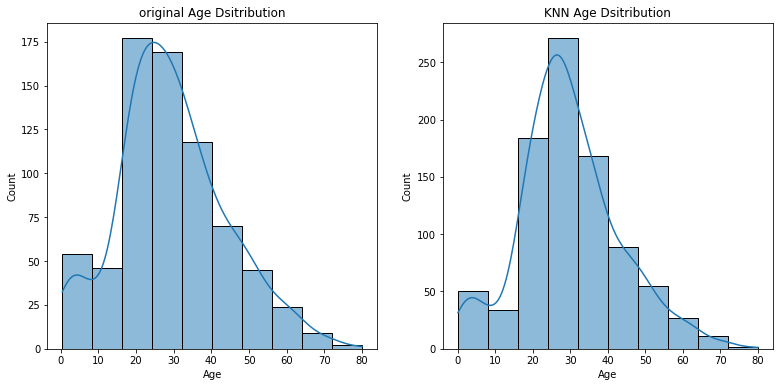

In [27]:
# 결측치 처리 전과 결측치 처리 후의 분포를 비교

fig, axes = plt.subplots(1,2, figsize = (13, 6))
sns.histplot(data = train_df, x = 'Age', ax = axes[0], bins=10, kde = True)
sns.histplot(data = data_imp, x = 'Age', ax = axes[1], bins=10, kde = True)

axes[0].set_title('original Age Dsitribution')
axes[1].set_title('KNN Age Dsitribution')
plt.show()

In [28]:
# 원본 데이터에서 결측치 처리
train_df['Age'] = data_imp['Age']

In [29]:
# 테스트 데이터에도 같은 결측치 처리

value_te = imputer.transform(data_imp_te)
data_imp_te = pd.DataFrame(columns = data_imp_te.columns, data = value_te)
test_df['Age'] = np.round(data_imp_te['Age'])

### [Embarked]

In [30]:
from sklearn.impute import SimpleImputer
s_imputer = SimpleImputer(strategy='most_frequent')

train_df['Embarked'] = s_imputer.fit_transform(train_df[['Embarked']])
test_df['Embarked'] = s_imputer.transform(test_df[['Embarked']])

### <font color = red> 항상 train set에 대해 처리를 했으면 test set에도 같은 처리를 해주어야 한다!

### [Fare]

In [31]:
# Fare에 있는 1개 결측값 제거
test_df.drop(test_df[test_df['Fare'].isna()].index, axis = 0, inplace = True)

#### 최종확인 

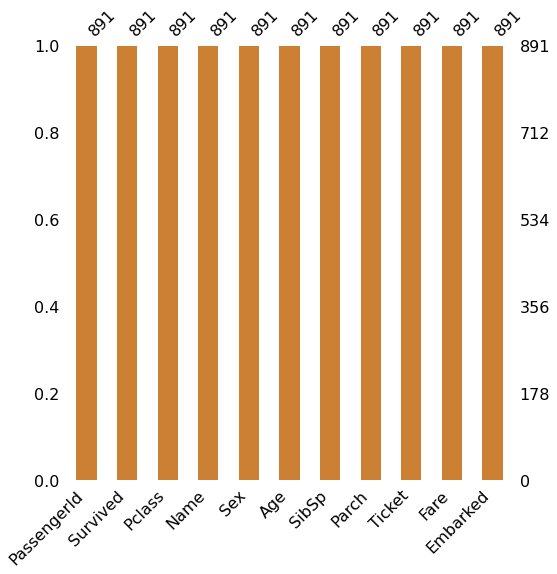

In [32]:
msno.bar(df = train_df,
           figsize=(8,8),
           color = (0.8, 0.5, 0.2))
plt.show()

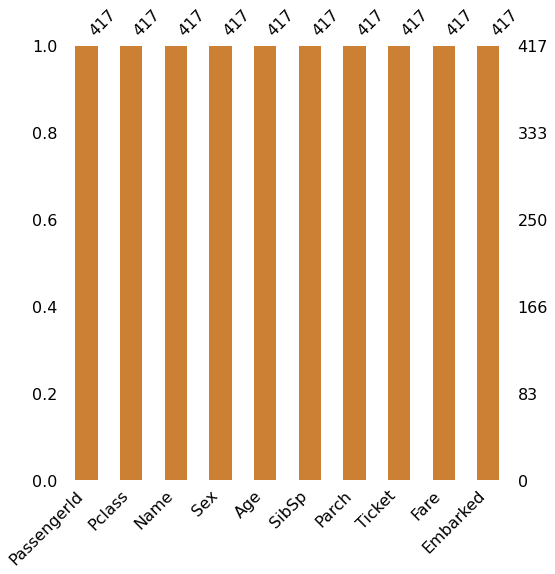

In [33]:
msno.bar(df = test_df,
           figsize=(8,8),
           color = (0.8, 0.5, 0.2))
plt.show()

# 범주형 변수 처리: One Hot Encoding

In [34]:
train_df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [35]:
# get dummies 함수로 one hot encoding

pd.get_dummies(train_df.Embarked, prefix = 'Embarked')

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [36]:
pd.concat([train_df.Embarked ,pd.get_dummies(train_df.Embarked, prefix = 'Embarked')], axis = 1)

,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,S,0,0,1
1,C,1,0,0
2,S,0,0,1
3,S,0,0,1
4,S,0,0,1
...,...,...,...,...
886,S,0,0,1
887,S,0,0,1
888,S,0,0,1
889,C,1,0,0


# 이상치 처리

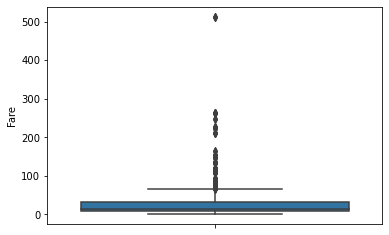

In [37]:
sns.boxplot(data = train_df , y = 'Fare')
plt.show()

In [38]:
def get_outlier(df=None,column=None,weight=1.5):
    
    column_x = df[column]
   
    # 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    quantile_25 = np.percentile(column_x.values,25)
    quantile_75 = np.percentile(column_x.values,75)
    
    
    # IQR을 구하고 IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 Dataframe index 반환
    outlier_index = column_x[(column_x < lowest_val) | (column_x > highest_val)].index
    return outlier_index

In [39]:
df_outlier = train_df.drop(get_outlier(df = train_df, column = 'Fare'), axis = 0)

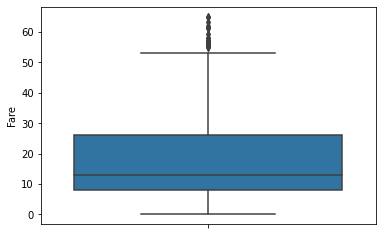

In [40]:
sns.boxplot(data = df_outlier, y = 'Fare')
plt.show()

#### 다른방법

In [41]:
# clip을 활용해 이상치(outlier)를 처리
# 낮은 0.05%와 높은 0.95% 데이터들을 대체한다.

train_df[['Fare']].apply(lambda x: x.clip(x.quantile(.01), x.quantile(.99)), axis=0)

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


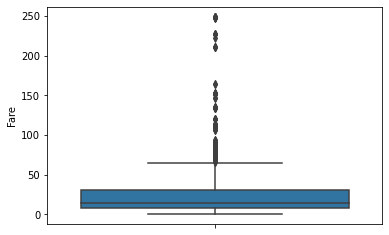

In [42]:
sns.boxplot(data = train_df[['Fare']].apply(lambda x: x.clip(x.quantile(.01), x.quantile(.99)), axis=0), y = 'Fare')
plt.show()

# Scaling

Scaling은 Numeric data에 대해서만 진행한다. (categoric은 노노!)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer

In [44]:
train_df['Fare_log'] = np.log1p(train_df['Fare'])
test_df['Fare_log'] = np.log1p(test_df['Fare'])

In [45]:
train_num = train_df[['Age','Fare', 'Fare_log']]
test_num = test_df[['Age','Fare', 'Fare_log']]

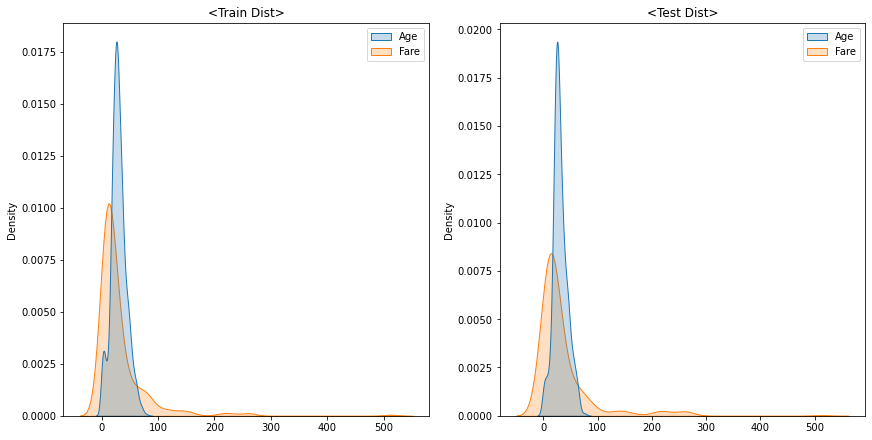

In [46]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6), constrained_layout=True)
sns.kdeplot(data = train_num[['Age','Fare']], shade = True, ax = axes[0])
axes[0].set_title('<Train Dist>')

sns.kdeplot(data = test_num[['Age','Fare']], shade = True, ax = axes[1])
axes[1].set_title('<Test Dist>')

plt.show()

In [47]:
scaler = StandardScaler()

train_num[['Age','Fare', 'Fare_log']] = scaler.fit_transform(train_num)
test_num[['Age','Fare','Fare_log']] = scaler.transform(test_num)

#### <font color = red> ※주의
<font color = red> - train에는 fit_transform을 적용, test에는 transform만 적용할 것.   
<font color = red> - scaler 변환 후에는 numpy array로 값이 나오기 때문에 위와같이 코드를 작성한 것.

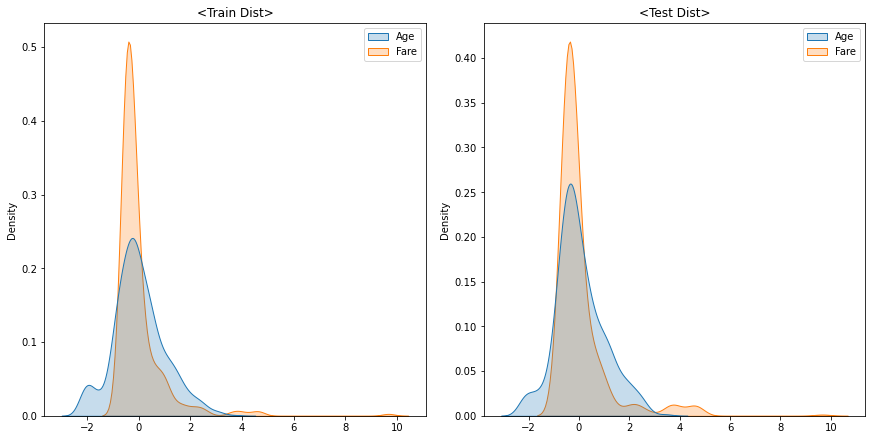

In [48]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6), constrained_layout=True)
sns.kdeplot(data = train_num[['Age','Fare']], shade = True, ax = axes[0])
axes[0].set_title('<Train Dist>')

sns.kdeplot(data = test_num[['Age','Fare']], shade = True, ax = axes[1])
axes[1].set_title('<Test Dist>')

plt.show()

# Transform

Fare data에 대해 log transform을 적용  

**log vs log1p**  
- 단순 np.log를 적용하면 0값을 포함한 데이터의 경우 -inf 라는 값을 가지게 된다.  
- 이를 방지하기 위해 log1p를 사용한다.

In [49]:
train_num.Fare_log.describe()

count    8.910000e+02
mean    -1.903951e-16
std      1.000562e+00
min     -3.058578e+00
25%     -8.002318e-01
50%     -2.316613e-01
75%      5.198636e-01
max      3.385294e+00
Name: Fare_log, dtype: float64

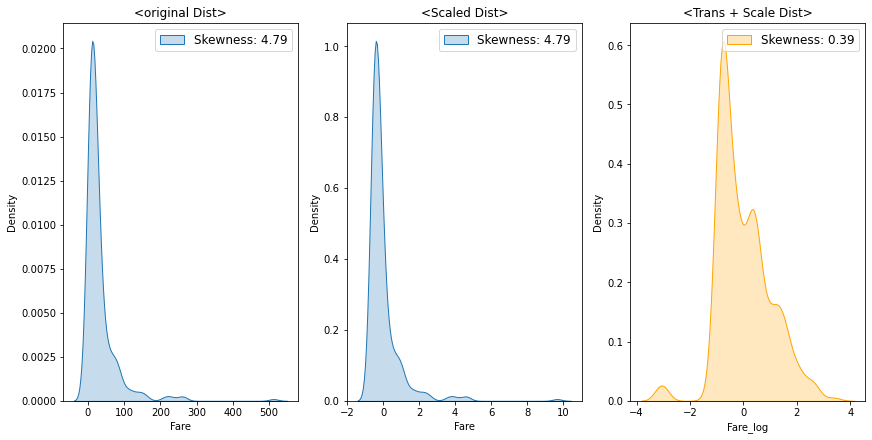

In [50]:
# 오리지널 data vs scaled data vs Trans + Scaled data 비교하기

fig, axes = plt.subplots(1, 3, figsize = (12, 6), constrained_layout=True)


sns.kdeplot(data = train_df['Fare'], shade = True, ax = axes[0], label = 'Skewness: {:.2f}'.format(train_df['Fare'].skew()))
axes[0].set_title('<original Dist>')
axes[0].legend(fontsize = 12)

sns.kdeplot(data = train_num['Fare'], shade = True, ax = axes[1], label = 'Skewness: {:.2f}'.format(train_num['Fare'].skew()))
axes[1].set_title('<Scaled Dist>')
axes[1].legend(fontsize = 12)

sns.kdeplot(data = train_num['Fare_log'], shade = True, ax = axes[2], label = 'Skewness: {:.2f}'.format(train_num['Fare_log'].skew()),
           color='orange')
axes[2].set_title('<Trans + Scale Dist>')
axes[2].legend(fontsize = 12)

plt.show()

# Feature Selection

### [보스턴 집값예측 Data ]

독립변수

- CRIM: 범죄율

- INDUS: 비소매상업지역 면적 비율

- NOX: 일산화질소 농도

- RM: 주택당 방 수

- LSTAT: 인구 중 하위 계층 비율

- B: 인구 중 흑인 비율

- PTRATIO: 학생/교사 비율

- ZN: 25,000 평방피트를 초과 거주지역 비율

- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0

- AGE: 1940년 이전에 건축된 주택의 비율

- RAD: 방사형 고속도로까지의 거리

- DIS: 직업센터의 거리

- TAX: 재산세율

종속변수

- 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

#### <font color = red> 집값 예측이기 때문에 회귀문제

In [51]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_target = pd.DataFrame(boston.target, columns=["MEDV"])
boston_df = pd.concat([boston_df, boston_target], axis = 1)

In [52]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [53]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 다중공선성(corr)을 활용한 Featrue Selection

- faeture 간의 correlation coeffiecient를 활용해 중요한 피쳐, 그렇지 않은 feature를 골라내자
- 상관계수의 범위는 -1 < x < 1 사이
- 상관계수 절대값이 크면 클 수록 높은 상관관계를 가지고 있으며 음수일 경우 음의 상관관계, 양수일 경우 양의 상관관계를 취함
- 상관계수가 |-0.1 ~ 0.1| 사이라면 거의 관계가 없다고 볼 수 있음

In [54]:
boston_df.drop('CHAS', axis=1, inplace = True)

In [55]:
boston_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


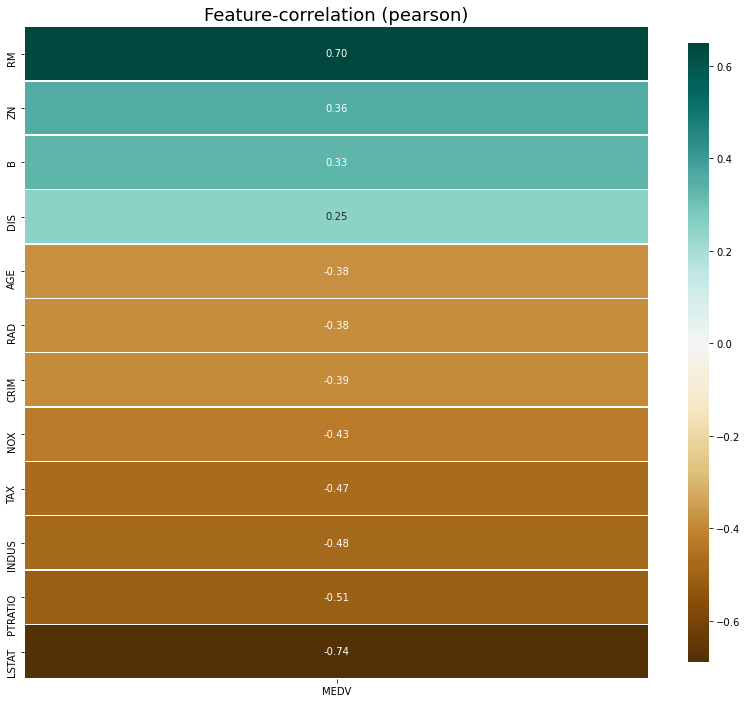

In [56]:
klib.corr_plot(data = boston_df.iloc[:, :-1], 
               target = boston_df.iloc[:, -1] ,
               figsize = (14, 12))

plt.show()

종속변수와 feature들과의 상관관계를 봤을 때 DIS 변수는 y값인 MEDV와 큰 상관성이 없어 보인다.
  
<font color = blue> --> DIS변수는 종속변수와 상관성이 떨어지기 때문에 제거

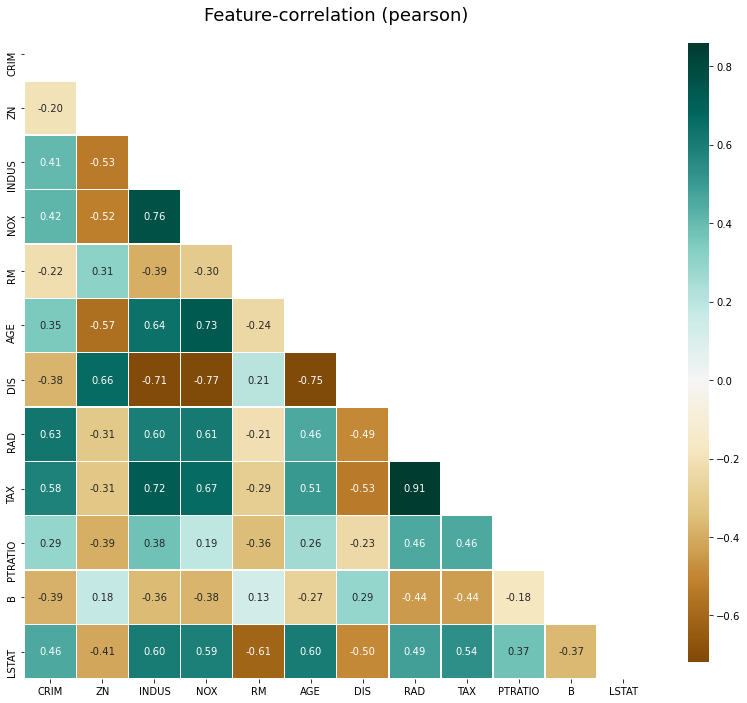

In [57]:
klib.corr_plot(data = boston_df.iloc[:, :-1] ,figsize = (14, 12))
plt.show()

독립변수들 끼리의 상관성을 보았을 때 TAX Feature와 RAD Feature는 0.91로 상관성이 강하게 나타난다. 

<font color = blue> --> 두 독립변수의 상관관계가 성능을 저하시킬 수 있으므로 둘 중 한 Feature를 제거한다. (Rad제거)

#### 그 외 다양한 Feature Selection 

In [58]:
boston_df_2 = boston_df.iloc[:,:-1].copy()

In [59]:
# 통계적인 방법으로 피쳐를 selection

from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k = 12)

# selector를 fit 하고 score와 p_value 등 원하는 지표를 data frame으로 다시 변환
X_new = selector.fit_transform(boston_df_2, boston_target)
names = boston_df_2.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
p_values = selector.pvalues_[selector.get_support()]

# 결과가 numpy.array로 나오기 떄문에 data frame화 시켜줌
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])


# 더 나은 시각화를 위해 sortings
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
ns_df_sorted

,Feat_names,F_Scores
11,LSTAT,601.617871
4,RM,471.846740
9,PTRATIO,175.105543
2,INDUS,153.954883
8,TAX,141.761357
3,NOX,112.591480
0,CRIM,89.486115
7,RAD,85.914278
5,AGE,83.477459
1,ZN,75.257642


In [60]:
# 모델을 기반으로 피쳐를 selection

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

selector2 = SelectFromModel(RandomForestRegressor(random_state=0), threshold=None)

boston_df_fs2 = selector2.fit(boston_df_2, boston_target).transform(boston_df_2)

In [61]:
print("boston_df_2.shape: {},  boston_df_fs2.shape: {}".format(boston_df_2.shape, boston_df_fs2.shape))

boston_df_2.shape: (506, 12),  boston_df_fs2.shape: (506, 2)


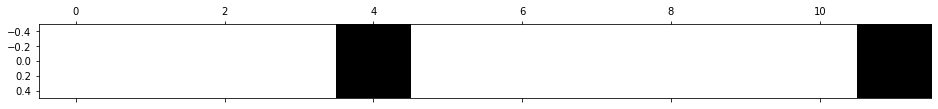

In [62]:
mask = selector2.get_support()
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.show()

# 검은색으로 표시된 부분이 랜덤 포레스트 모델이 중요하다고 여기는 것.

In [104]:
# tree model 기반의 feature importance

rf = RandomForestRegressor()
rf.fit(boston_df_2, boston_target)

RandomForestRegressor()

In [120]:
feature_import = pd.Series(rf.feature_importances_, boston_df_2.columns)

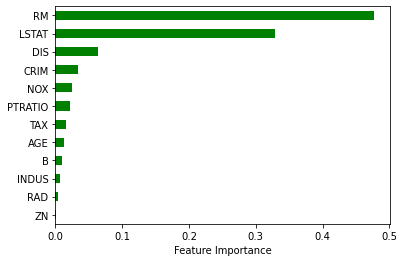

In [132]:
feature_import.sort_values(ascending = True).plot(kind = 'barh', color = 'green')
plt.xlabel('Feature Importance')
plt.show()

# PCA

In [63]:
boston_df_3 = boston_df.iloc[:,:-1].copy()

In [64]:
boston_df_3.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


각 컬럼마다 scale이 다르기 때문에 scale을 맞추어준 후 pca를 진행한다.

In [65]:
boston_scale = StandardScaler().fit_transform(boston_df_3)

In [66]:
# fit_transfrom 후에는 보통 numpy array로 결과 도출
boston_scale

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [67]:
from sklearn.decomposition import PCA
boston_pca = PCA().fit(boston_scale) 

In [68]:
np.cumsum(boston_pca.explained_variance_ratio_)

array([0.5105599 , 0.62243317, 0.72074858, 0.79033741, 0.84572669,
       0.8905106 , 0.92354539, 0.94663435, 0.96498981, 0.98050326,
       0.99461286, 1.        ])

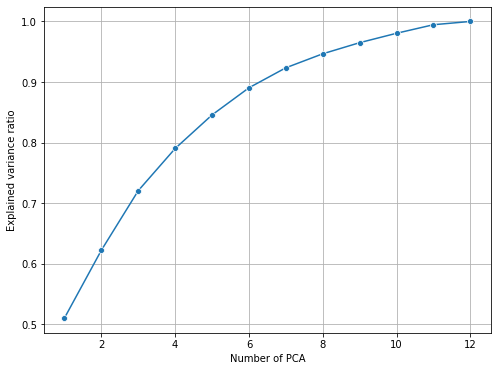

In [69]:
fig ,ax = plt.subplots(1,1, figsize = (8, 6))
sns.lineplot(np.arange(1,boston_scale.shape[1]+1),np.cumsum(boston_pca.explained_variance_ratio_), marker = 'o', ax=ax )
plt.grid()
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

- PC차원이 8개일 때 전체 data의 90% 정도를 설명할 수 있다.  
- 전체데이터의 어느정도를 설명할 지 결정하는 것은 본인의 몫이다.

In [70]:
boston_pca = PCA(n_components= 8).fit_transform(boston_scale) 

In [71]:
pd.DataFrame(boston_pca)

,0,1,2,3,4,5,6,7
0,-2.097234,-0.720179,0.928919,0.510654,-0.177224,0.373865,0.280995,-0.432829
1,-1.456003,-0.947694,-0.180930,-0.142794,0.365367,0.577706,-0.228575,-0.169264
2,-2.073454,-0.625336,0.674848,-0.852583,0.585879,0.513743,0.097473,0.065038
3,-2.610161,-0.134044,0.070900,-1.060711,0.755441,0.627955,0.254385,-0.343961
4,-2.456866,-0.229919,0.160148,-1.013400,0.723566,0.717869,-0.137071,-0.419342
...,...,...,...,...,...,...,...,...
501,-0.313721,-1.143840,-0.264730,-1.067946,0.607042,0.218384,-0.255799,0.872615
502,-0.109236,-1.326699,-0.640178,-0.852341,0.487915,0.207443,-0.151127,0.850170
503,-0.311283,-1.395246,0.428959,-1.504774,0.623730,0.333117,-0.648274,0.975934
504,-0.269391,-1.350590,0.188819,-1.337234,0.620280,0.304402,-0.587531,0.932354


#### 함수활용 pca 

In [72]:
def getPCA(df):
    max_col = df.shape[1]
    pca = PCA(n_components=max_col, random_state=0).fit(df)

    cumsum = np.cumsum(pca.explained_variance_ratio_) 
    num_col = np.argmax(cumsum >= 0.9) + 1 

    pca = PCA(n_components = num_col, random_state=0).fit_transform(df)
    return pd.DataFrame(pca)   

In [73]:
getPCA(boston_scale)

,0,1,2,3,4,5,6
0,-2.097234,-0.720179,0.928919,0.510654,-0.177224,0.373865,0.280995
1,-1.456003,-0.947694,-0.180930,-0.142794,0.365367,0.577706,-0.228575
2,-2.073454,-0.625336,0.674848,-0.852583,0.585879,0.513743,0.097473
3,-2.610161,-0.134044,0.070900,-1.060711,0.755441,0.627955,0.254385
4,-2.456866,-0.229919,0.160148,-1.013400,0.723566,0.717869,-0.137071
...,...,...,...,...,...,...,...
501,-0.313721,-1.143840,-0.264730,-1.067946,0.607042,0.218384,-0.255799
502,-0.109236,-1.326699,-0.640178,-0.852341,0.487915,0.207443,-0.151127
503,-0.311283,-1.395246,0.428959,-1.504774,0.623730,0.333117,-0.648274
504,-0.269391,-1.350590,0.188819,-1.337234,0.620280,0.304402,-0.587531


#### <font color = red> PCA는 one-hot-Encoding 같이 실질적인 데이터는 적은데 차원은 많은 Sparse data 등을 줄이기 위한 방법으로도 사용된다!